# Weiss Mean Field Theory of a Ferromagnet

### e)
Show graphically that in zero external field
(B = 0), below the critical temperature, there
are solutions of the self-consistency equation with
M = 0.



Solutions: [-0.4788, 0.0, 0.4788]
Corresponding values: [-0.4788, 0.0, 0.4788]


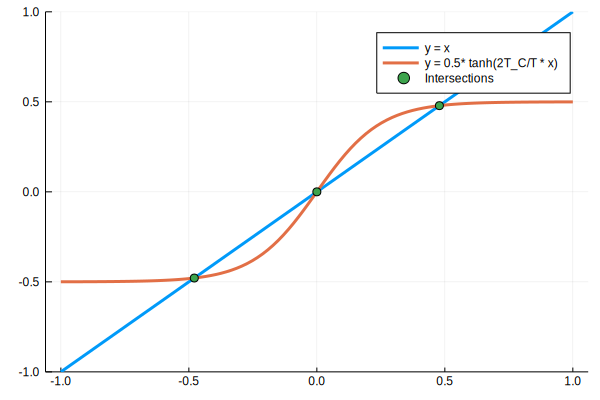

In [1]:
using LinearAlgebra
using Plots
using Roots

# R.H.S. of Self-Consistency Equation
f(x, T, T_C = 1.0) = 0.5 * tanh(2 * T_C / T * x)

X = range(-1, 1, length = 100) 
T = 0.5
Y = f.(X, Ref(T));

plot(X, X, ylims=(-1,1), label="y = x", lw = 3)
plot!(X, Y, label = "y = 0.5* tanh(2T_C/T * x)", lw = 3)

# Find solutions of the Self-Consistency Eq. with a root-finding package
g(x) = f(x,T) - x
solutions = Roots.find_zeros(g, -1.0, 1.0)
values = f.(solutions,Ref(T))
println("Solutions: $(round.(solutions, digits=4))")
println("Corresponding values: $(round.(values, digits=4))")
scatter!(solutions, values, label = "Intersections")



# Molecular field

Styrkur ímyndaða meðalsviðs Weiss við herbergishitastig ($J = 1$):

$$
H_m = wI \approx wNM = \frac{3J k_B \Theta_f}{(J+1)NM^2} \cdot NM = \boxed{\frac{3}{2}\frac{k_B \Theta_f}{M}}
$$


In [2]:
function H(θ, M)
    k_B = 1.38E-23 # J / K
    μ_B = 9.27E-24 # J / T
    H_m = 1.5 * k_B * θ / (M * μ_B)
    return H_m
end

H (generic function with 1 method)

In [3]:
struct Ferromagnet
    name    ::String
    θ       ::Float64 # Kelvin (K)
    M       ::Float64 # Bohr Magneton (μ_B)
    H_m     ::Float64 # Tesla (T)
    
    Ferromagnet(name, θ, M) = new(name, θ, M,  H(θ, M))
end


In [4]:
iron = Ferromagnet("Iron", 1040.2, 2.216);
cobalt = Ferromagnet("Cobalt", 1395, 1.739);
nickel = Ferromagnet("Nickel", 628.3, 0.616);

In [5]:
using DataFrames
using Latexify

df = DataFrame()
ferromagnets = [iron, cobalt, nickel]

df.Ferromagnets = [fm.name for fm in ferromagnets]
df.Curie_temperature = [fm.θ for fm in ferromagnets]
df.Magnetic_moment = [fm.M for fm in ferromagnets]
df.Molecular_field = [fm.H_m for fm in ferromagnets]

latexify(df, fmt = "%.2f") |> display

| Ferromagnets | Curie_temperature | Magnetic_moment | Molecular_field |
| ------------:| -----------------:| ---------------:| ---------------:|
|       $Iron$ |         $1040.20$ |          $2.22$ |       $1048.18$ |
|     $Cobalt$ |         $1395.00$ |          $1.74$ |       $1791.29$ |
|     $Nickel$ |          $628.30$ |          $0.62$ |       $2277.60$ |
